In [9]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np

from duke_dbt_data import dcmread_image, read_boxes, draw_box

In [10]:
# df = pd.read_csv("/.csv",delimiter=',')
df = pd.read_csv("labels-train.csv")
df

,PatientID,StudyUID,View,Normal,Actionable,Benign,Cancer
0,DBT-P00013,DBT-S00163,rmlo,0,0,1,0
1,DBT-P00023,DBT-S04378,lcc,0,1,0,0
2,DBT-P00023,DBT-S04378,lmlo,0,1,0,0
3,DBT-P00023,DBT-S04378,rcc,0,1,0,0
4,DBT-P00023,DBT-S04378,rmlo,0,1,0,0
...,...,...,...,...,...,...,...
19143,DBT-P04356,DBT-S00073,rmlo,1,0,0,0
19144,DBT-P01481,DBT-S01753,lcc,1,0,0,0
19145,DBT-P01481,DBT-S01753,lmlo,1,0,0,0
19146,DBT-P01481,DBT-S01753,rcc,1,0,0,0


In [14]:
df = read_boxes(boxes_fp="BCS-DBT boxes-train-v2.csv", filepaths_fp="file-paths.csv")
df['descriptive_path'] = '/Users/lucas.wojahn/Documents/GitHub/duke-dbt-data/data/manifest-1677805544485/' + df['descriptive_path'].astype(str)
df

,PatientID,StudyUID,View,Subject,Slice,X,Y,Width,Height,Class,AD,VolumeSlices,descriptive_path,classic_path
0,DBT-P00013,DBT-S00163,rmlo,0,16,1116,1724,218,105,benign,0,49,/Users/lucas.wojahn/Documents/GitHub/duke-dbt-...,Breast-Cancer-Screening-DBT/DBT-P00013/1.2.826...
1,DBT-P00024,DBT-S03255,lcc,0,19,267,488,64,64,benign,0,73,/Users/lucas.wojahn/Documents/GitHub/duke-dbt-...,Breast-Cancer-Screening-DBT/DBT-P00024/1.2.826...
2,DBT-P00024,DBT-S03255,lcc,0,37,169,384,93,85,benign,0,73,/Users/lucas.wojahn/Documents/GitHub/duke-dbt-...,Breast-Cancer-Screening-DBT/DBT-P00024/1.2.826...
3,DBT-P00024,DBT-S03255,lmlo,0,11,471,1060,67,56,benign,0,81,/Users/lucas.wojahn/Documents/GitHub/duke-dbt-...,Breast-Cancer-Screening-DBT/DBT-P00024/1.2.826...
4,DBT-P00024,DBT-S03255,lmlo,0,12,640,673,93,80,benign,0,81,/Users/lucas.wojahn/Documents/GitHub/duke-dbt-...,Breast-Cancer-Screening-DBT/DBT-P00024/1.2.826...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,DBT-P05030,DBT-S05569,rmlo,2,24,1465,624,84,115,cancer,0,74,/Users/lucas.wojahn/Documents/GitHub/duke-dbt-...,Breast-Cancer-Screening-DBT/DBT-P05030/1.2.826...
220,DBT-P05047,DBT-S05588,rcc,0,41,1341,1073,387,499,benign,1,78,/Users/lucas.wojahn/Documents/GitHub/duke-dbt-...,Breast-Cancer-Screening-DBT/DBT-P05047/1.2.826...
221,DBT-P05047,DBT-S05588,rmlo,0,41,1192,1019,456,541,benign,1,76,/Users/lucas.wojahn/Documents/GitHub/duke-dbt-...,Breast-Cancer-Screening-DBT/DBT-P05047/1.2.826...
222,DBT-P05056,DBT-S01839,rcc,0,44,1642,661,245,392,cancer,1,72,/Users/lucas.wojahn/Documents/GitHub/duke-dbt-...,Breast-Cancer-Screening-DBT/DBT-P05056/1.2.826...


In [15]:
box_series = df.iloc[0]
# box_series['descriptive_path'] = '/Users/lucas.wojahn/Documents/GitHub/duke-dbt-data/data/train/DBT-P00013-e47791d6-fa40-423e-b73d-0edc865a266c.jpg'
print(box_series)
view = box_series["View"]
slice_index = box_series["Slice"]
# image_path = os.path.join("/data", view_series["classic_path"])
split = box_series['descriptive_path'].split('/')
split[-2] = split[-2].replace('-','-NA-')
image_path = '/'.join(split)
# image_path = box_series['descriptive_path']
print(image_path)

PatientID                                                  DBT-P00013
StudyUID                                                   DBT-S00163
View                                                             rmlo
Subject                                                             0
Slice                                                              16
X                                                                1116
Y                                                                1724
Width                                                             218
Height                                                            105
Class                                                          benign
AD                                                                  0
VolumeSlices                                                       49
descriptive_path    /Users/lucas.wojahn/Documents/GitHub/duke-dbt-...
classic_path        Breast-Cancer-Screening-DBT/DBT-P00013/1.2.826...
Name: 0, dtype: obje

(49, 2457, 1890)
CPU times: user 7.64 s, sys: 2.2 s, total: 9.84 s
Wall time: 10.8 s


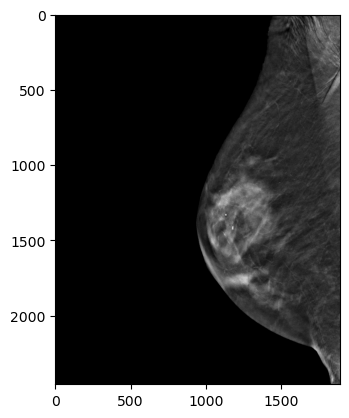

In [17]:
%%time
##DEMONSTRANDO O SHAPE DA IMAGEM
# image = dcmread_image(fp=image_path, view=view, index=slice_index)
image = dcmread_image(fp=image_path, view=view)
print(image.shape)
plt.imshow(image[0], cmap=plt.cm.gray)
# image = np.array(Image.open(image_path))

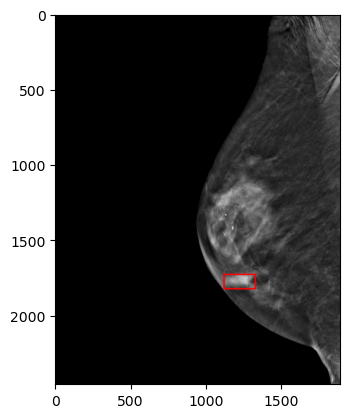

In [33]:
x, y, width, height = box_series[["X", "Y", "Width", "Height"]]
image = draw_box(image=image, x=x, y=y, width=width, height=height, lw=10)
plt.imshow(image, cmap=plt.cm.gray)
plt.imsave('decoded.jpg', image, format="jpg", cmap=plt.cm.gray)

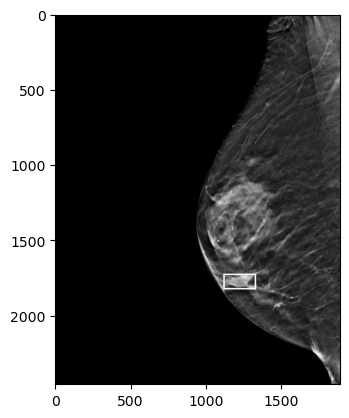

In [37]:
x, y, width, height = box_series[["X", "Y", "Width", "Height"]]

image = draw_box(image=image, x=x, y=y, width=width, height=height, lw=10)
plt.imshow(image, cmap=plt.cm.gray)
plt.imsave('raw.jpg', image,  format="jpg", cmap=plt.cm.gray)